In [40]:
import pandas as pd
import statsmodels.api as sm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

df=pd.read_csv(r"C:\Users\talib\Downloads\Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [2]:
# Information about the Data - MetaData
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [3]:
# Decription Analysis
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


C:\Users\talib\AppData\Local\Temp\ipykernel_25520\2927741321.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Time on App",y="Yearly Amount Spent",data=df,marker="^",palette="plasma")


<function matplotlib.pyplot.show(close=None, block=None)>

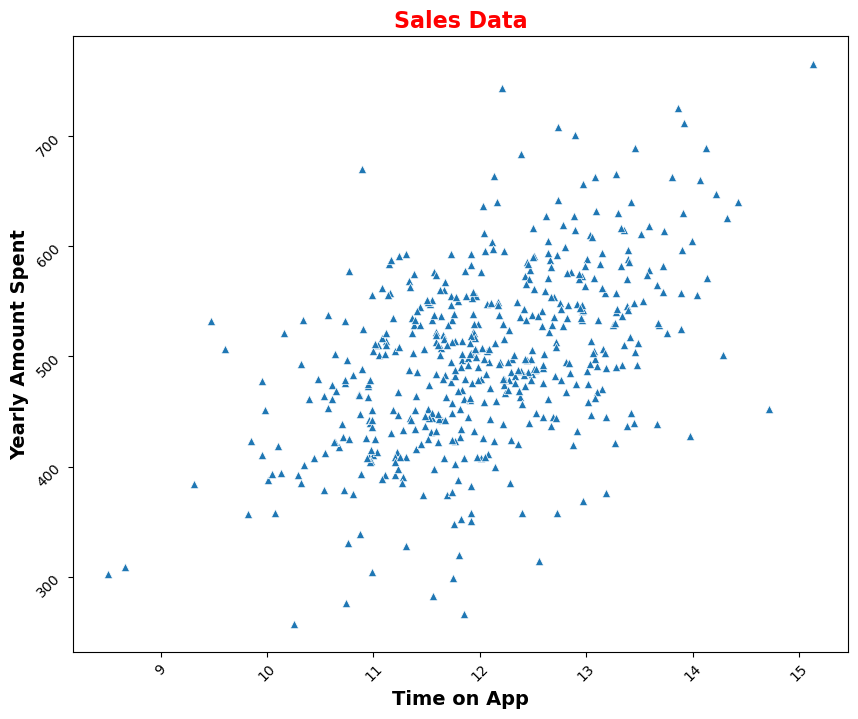

In [6]:
# By Graph Data Analysis
plt.figure(figsize=(10,8))
sns.scatterplot(x="Time on App",y="Yearly Amount Spent",data=df,marker="^",palette="plasma")
plt.title("Sales Data",color="red",fontweight="bold",fontsize=16)
plt.xlabel("Time on App",color="black",fontweight="bold",fontsize=14)
plt.ylabel("Yearly Amount Spent",color="black",fontweight="bold",fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

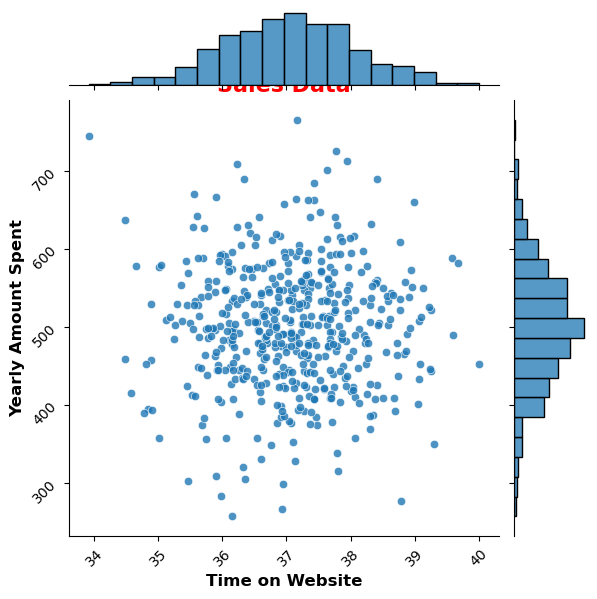

In [7]:
sns.jointplot(x="Time on Website",y="Yearly Amount Spent",data=df,alpha=0.8)
plt.title("Sales Data",color="red",fontweight="bold",fontsize=16)
plt.xlabel("Time on Website",color="black",fontweight="bold",fontsize=12)
plt.ylabel("Yearly Amount Spent",color="black",fontweight="bold",fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show

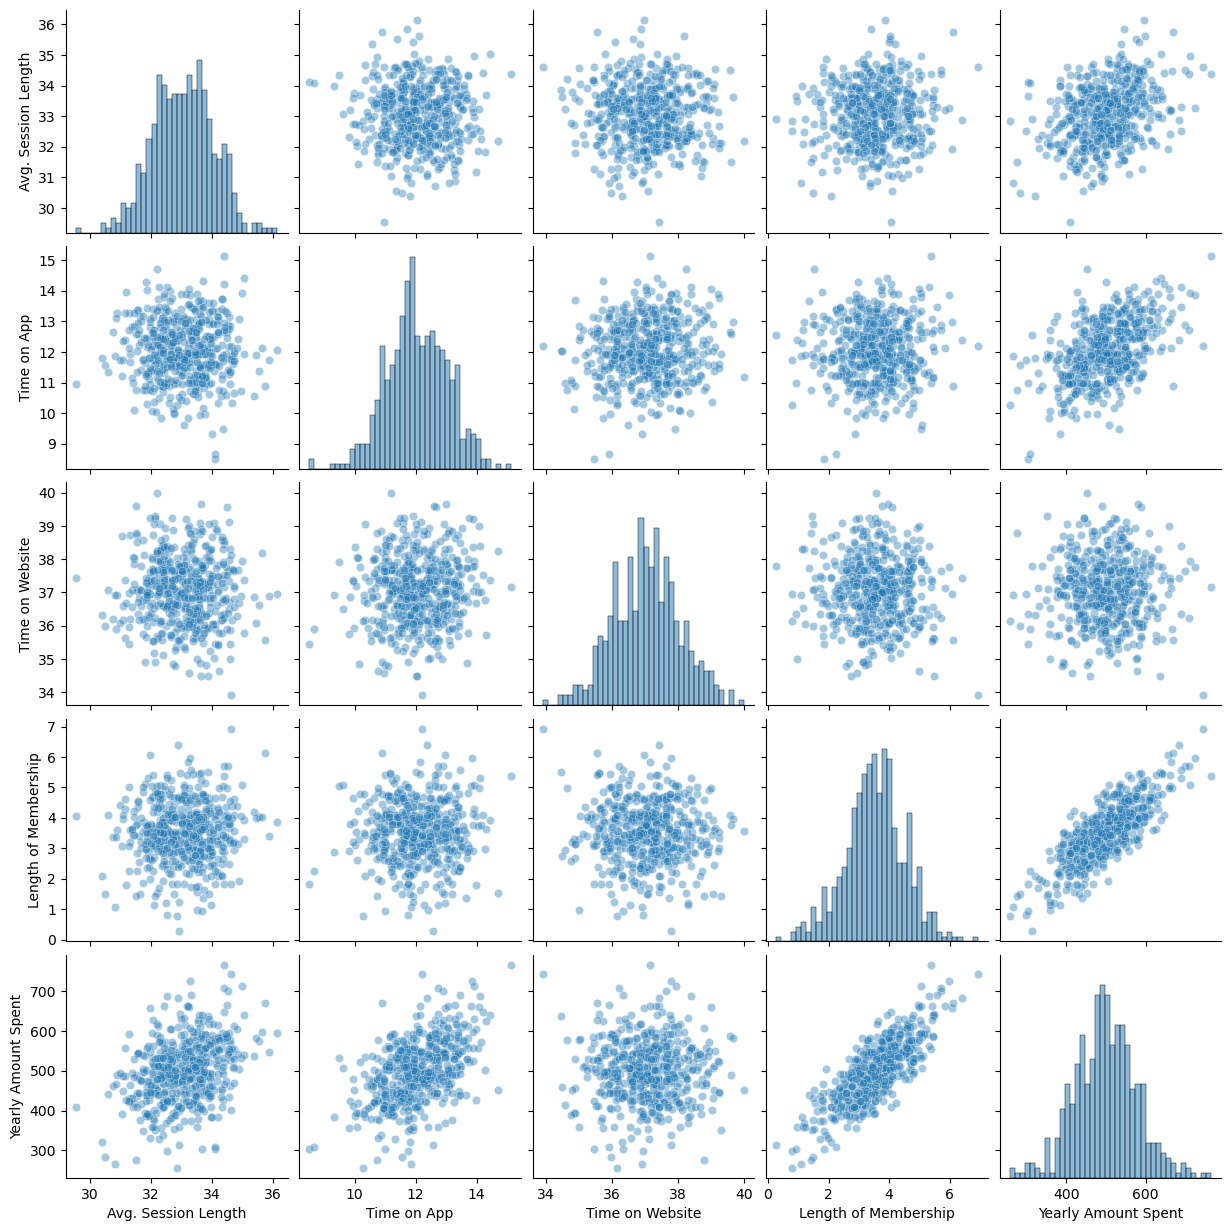

In [14]:
sns.pairplot(df , kind='scatter', plot_kws={'alpha':0.4 }, diag_kws={'alpha':0.5,'bins':40})

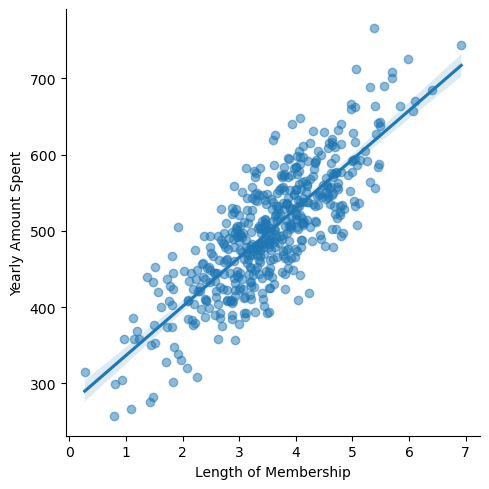

In [15]:
sns.lmplot(x="Length of Membership" , y="Yearly Amount Spent", data=df , scatter_kws={'alpha':0.5})

In [21]:
# Data Splitting
X=df[["Avg. Session Length" , "Time on App", "Time on Website", "Length of Membership"]]
y=df["Yearly Amount Spent"]
# y.head()
# X.head()

X_train,X_test,y_train,y_test=train_test_split( X , y , test_size=0.3 , random_state=42)


361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
266    554.003093
23     519.340989
222    502.409785
261    514.009818
426    530.766719
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [22]:
# Model & It's Trainig 
lr=LinearRegression()
lr.fit(X_train , y_train)

In [27]:
lr.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [28]:
lr.score(X,y)

0.9842821675307221

In [33]:
# Coefficient to DataFram
cdf=pd.DataFrame(lr.coef_ , X.columns, columns=['Coef'])
cdf.head()

,Coef
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


In [41]:
# Training with MultiVariable Regression 
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Tue, 03 Feb 2026   Prob (F-statistic):          3.46e-315
Time:                         13:59:22   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [44]:
predictions=lr.predict(X_test)

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

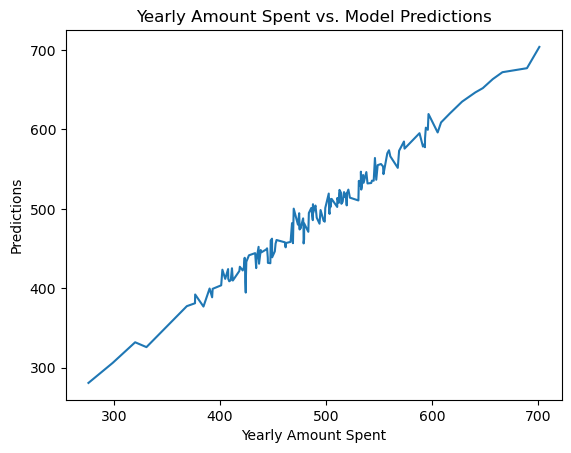

In [50]:
sns.lineplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

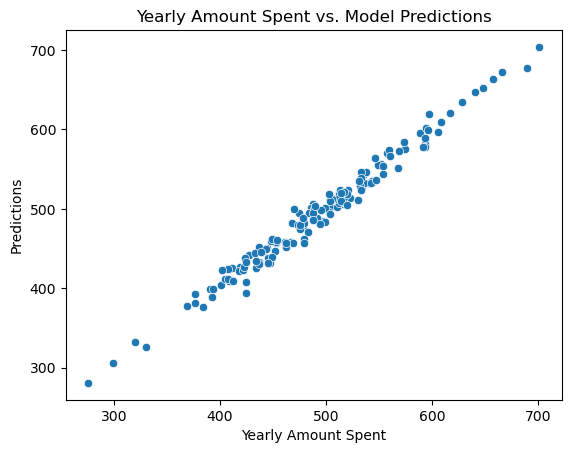

In [51]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

In [55]:
# Evaluation
print(f"Mean Absolute Error :{mean_absolute_error(y_test,predictions):.4f}")
print(f"Mean Squared Error :{mean_squared_error(y_test,predictions):.4f}")


Mean Absolute Error :8.4261
Mean Squared Error :103.9155


C:\Users\talib\AppData\Local\Temp\ipykernel_25520\479804111.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual , bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

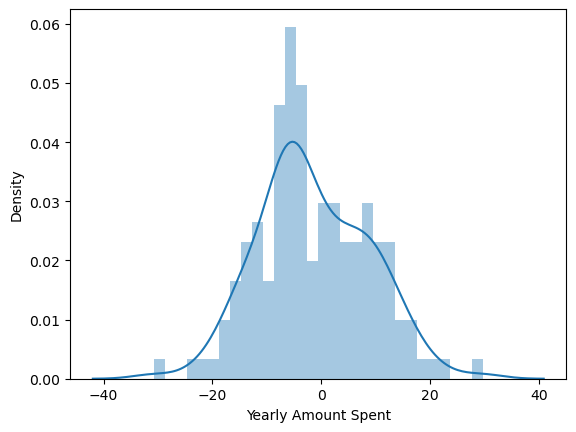

In [58]:
# Residuals
residual=y_test-predictions
sns.distplot(residual , bins=30)